# **Fish Weight Prediction Using Linear Regression**

**Import Library**

In [131]:
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [132]:
fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

**Explore Data**

In [133]:
fish.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [134]:
fish.shape

(159, 8)

In [135]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [136]:
fish.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [137]:
fish.dtypes

Category      int64
Species      object
Weight      float64
Height      float64
Width       float64
Length1     float64
Length2     float64
Length3     float64
dtype: object

**Identifying Missing Values**

In [138]:
fish.isnull()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False,False


In [139]:
fish.isnull().sum()

Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

**Data Preprocessing**

In [140]:
# Oulier Visulaization

<Axes: >

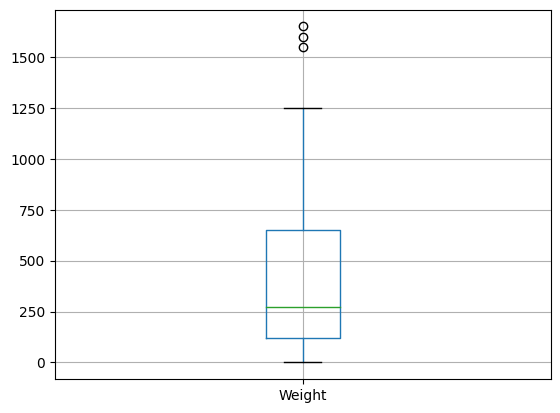

In [141]:
fish.boxplot(column=['Weight'])

<Axes: >

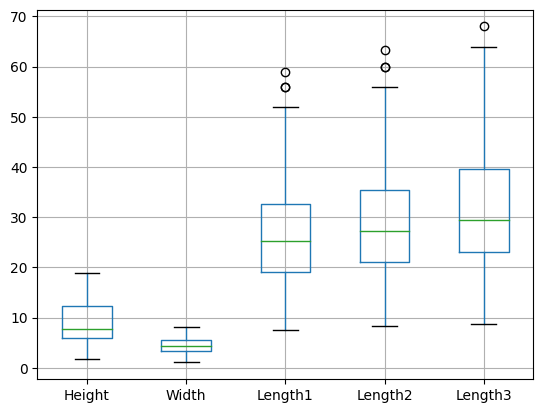

In [142]:
fish.boxplot(column=['Height', 'Width', 'Length1','Length2', 'Length3'])

In [143]:
fish.head(1)

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.52,4.02,23.2,25.4,30.0


In [144]:
fish1 = fish.copy()

In [145]:
fish1.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [146]:
numeric_cols = fish1.select_dtypes(include=[float, int]).columns

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = fish1[numeric_cols].quantile(0.25)
Q3 = fish1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

Category      2.50000
Weight      530.00000
Height        6.42110
Width         2.19885
Length1      13.65000
Length2      14.50000
Length3      16.50000
dtype: float64

**Identifying and Removing Outlier**

In [147]:
outliers = fish1[((fish1[numeric_cols] < (Q1 - 1.5 * IQR)) | (fish1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
142,4,Pike,1600.0,9.600,6.144,56.0,60.0,64.0
143,4,Pike,1550.0,9.600,6.144,56.0,60.0,64.0
144,4,Pike,1650.0,10.812,7.480,59.0,63.4,68.0


In [148]:
out = fish1[~((fish1[numeric_cols] < (Q1 - 1.5 * IQR)) | (fish1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
fish = out.copy()
fish.shape

(156, 8)

**Data Visualization**

In [149]:
fish.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

<ipython-input-150-345a257d9aa3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = fish, x = 'Species',palette='muted')


<Axes: xlabel='Species', ylabel='count'>

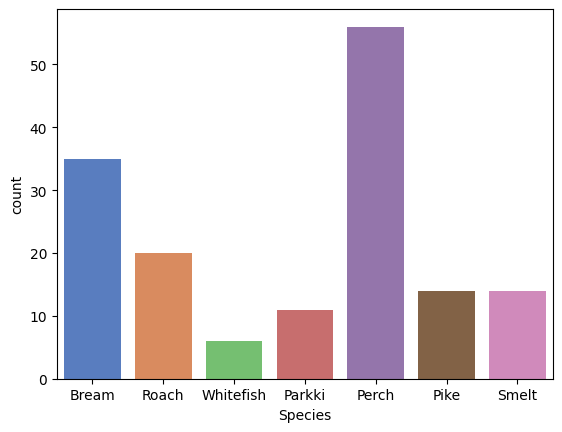

In [150]:
sns.countplot(data = fish, x = 'Species',palette='muted')

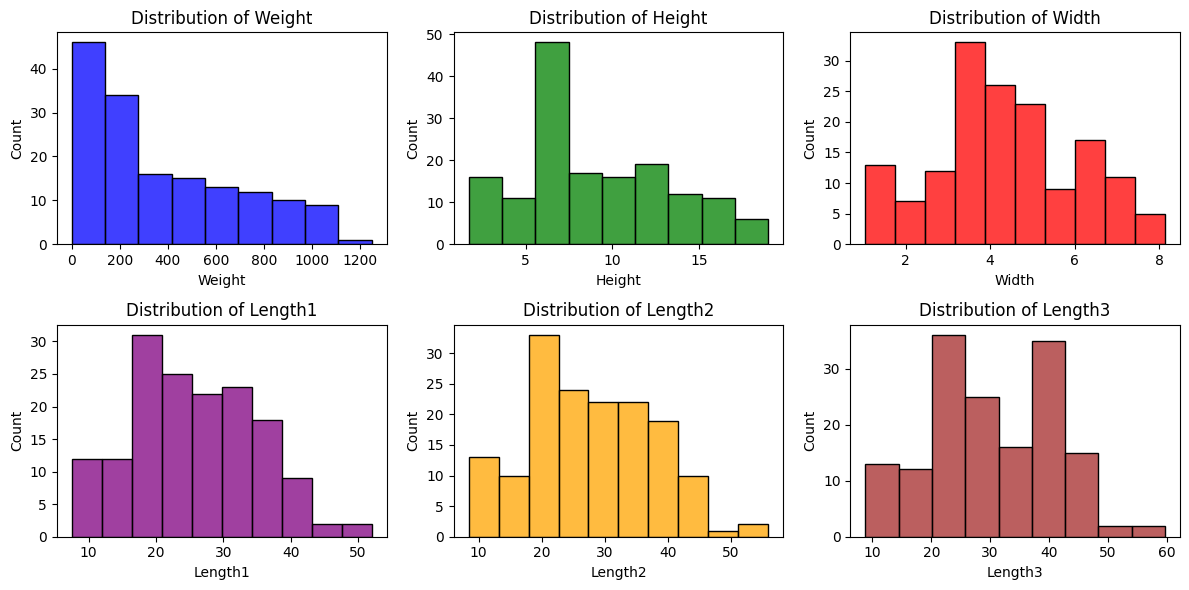

In [151]:
plt.figure(figsize=[12, 6])

# Weight
plt.subplot(2, 3, 1)
sns.histplot(fish['Weight'], color='blue')
plt.title('Distribution of Weight')

# Height
plt.subplot(2, 3, 2)
sns.histplot(fish['Height'], color='green')
plt.title('Distribution of Height')

# Width
plt.subplot(2, 3, 3)
sns.histplot(fish['Width'], color='red')
plt.title('Distribution of Width')

# Length1
plt.subplot(2, 3, 4)
sns.histplot(fish['Length1'], color='purple')
plt.title('Distribution of Length1')

# Length2
plt.subplot(2, 3, 5)
sns.histplot(fish['Length2'], color='orange')
plt.title('Distribution of Length2')

# Length3
plt.subplot(2, 3, 6)
sns.histplot(fish['Length3'], color='brown')
plt.title('Distribution of Length3')

plt.tight_layout()
plt.show()

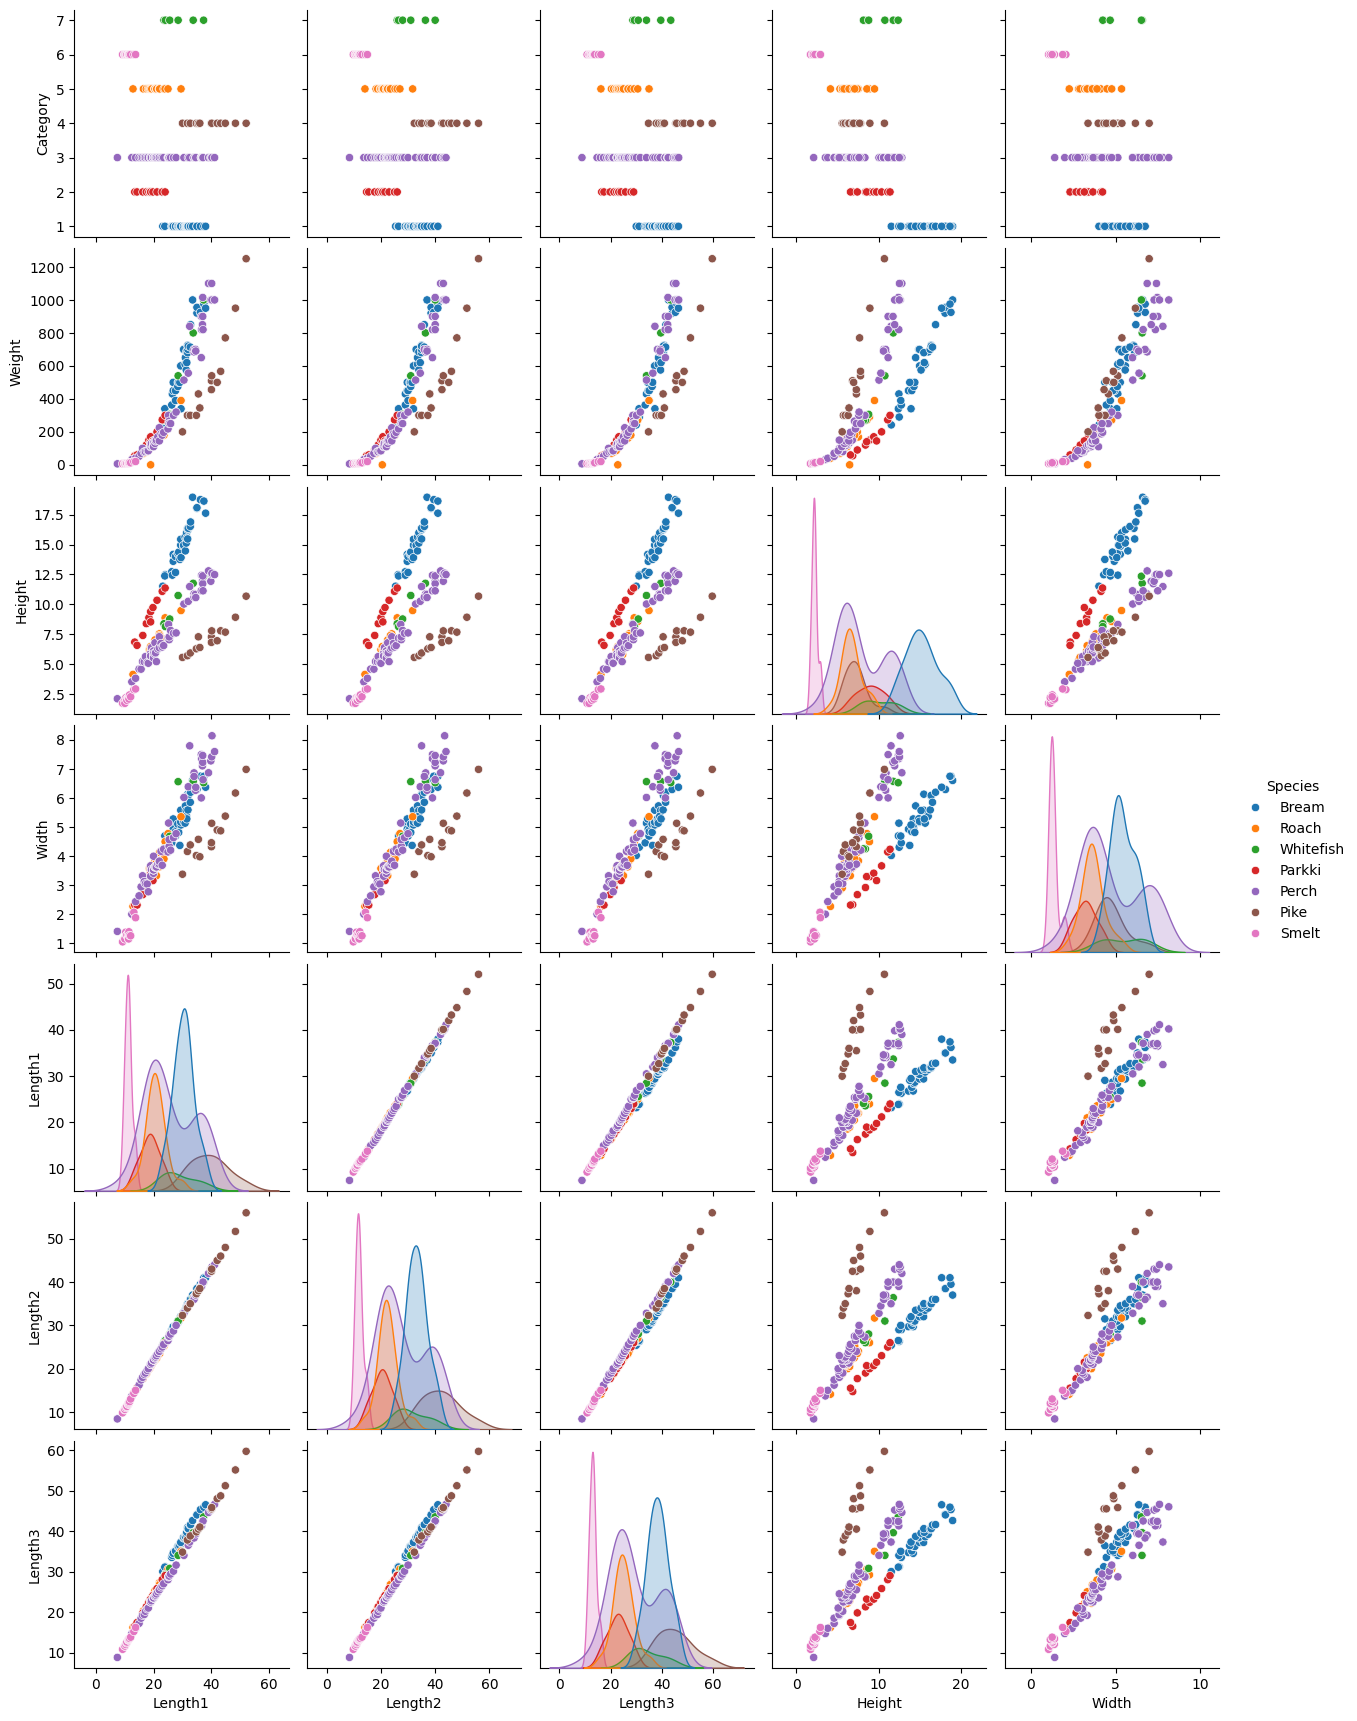

In [152]:
sns.pairplot(data=fish, x_vars=['Length1','Length2','Length3','Height','Width'], hue='Species')

**Correlation Visualization**

In [153]:
variables = ['Weight','Length1', 'Length2', 'Length3','Height', 'Width',]
corr_matrix = fish[variables].corr()
corr_matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Length1,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Length2,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length3,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542
Width,0.923432,0.889166,0.895584,0.897053,0.800542,1.000000


<Axes: >

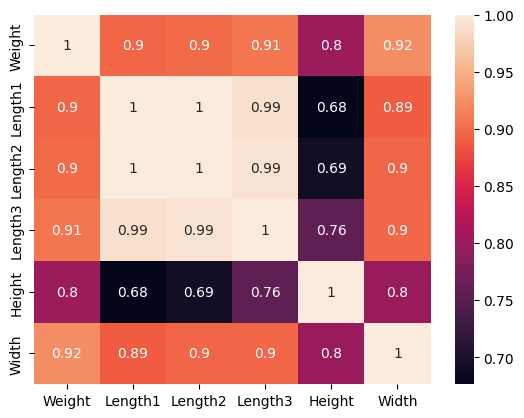

In [154]:
sns.heatmap(corr_matrix, annot = True)

## **Define Target Variable (y) and Feature Variables (X)**

In [155]:
fish.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [156]:
Y = fish['Weight']
X = fish[['Category','Height', 'Width', 'Length1', 'Length2', 'Length3']]

## **Train Test Split**

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [159]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((109, 6), (47, 6), (109,), (47,))

## **Modeling**

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
model = LinearRegression()

In [162]:
model.fit(X_train,Y_train)

LinearRegression()

In [163]:
model.intercept_

-583.816987629041

In [164]:
model.coef_

array([ 32.9097501 ,  53.18494254,  19.44560134,  49.34958364,
        26.84137617, -56.26368108])

## **Prediction**

In [165]:
Y_pred = model.predict(X_test)

In [166]:
Y_pred

array([ -13.33260615, -109.4027886 ,  151.22498796,  227.42995421,
        419.07985735,  484.53297838,  595.4612211 ,  848.34103578,
        722.18856085,  206.27900334,   81.43662086,  636.20219929,
        679.36885619,  379.65314113,  517.73646834,  255.52424056,
       -128.79587443,  356.63695294,  871.86171731,  712.28353586,
        699.51194657,  -50.99562014,  691.89254853,  468.49513107,
        617.88901781,  818.26742935,   23.86346913,  331.45717738,
        366.03397962,  495.9203083 ,  499.39165243,  897.70714864,
        439.69196852,  304.88284674,  771.68243959,  486.43171257,
        690.43373097,  274.02363107,  869.79523167,  615.46204201,
        660.7895346 ,  637.97514786,  160.27285052,  141.61672835,
        503.77878078,  255.53790696,  644.48690592])

In [167]:
Y_pred.shape

(47,)

## **Model Evaluation**

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [169]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  9036.893965607464


In [170]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  77.22023815226162


In [171]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.9064062975367161


## **Actual vs Predicted Results**

In [182]:
result = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
result.head(15)

,Actual,Predicted
0,19.7,-13.332606
1,9.7,-109.402789
2,135.0,151.224988
3,140.0,227.429954
4,300.0,419.079857
5,500.0,484.532978
6,600.0,595.461221
7,820.0,848.341036
8,840.0,722.188561
9,170.0,206.279003


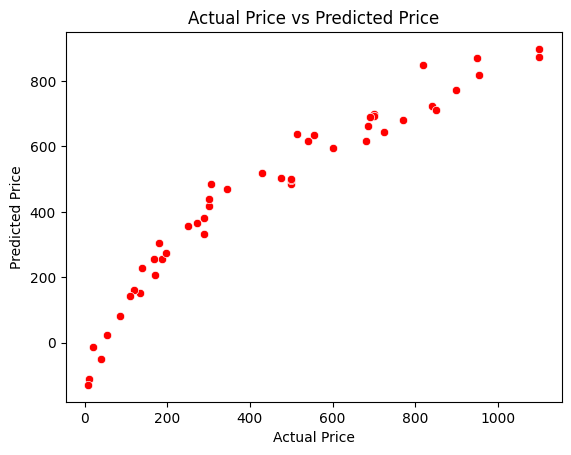

In [177]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()